Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 1)                 2         
_________________________________________________________________
dense_8 (Dense)              (None, 64)                128       
_________________________________________________________________
dense_9 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                

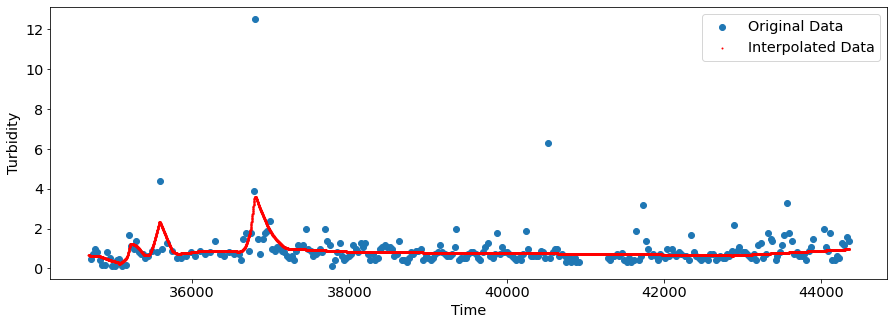

313/313 [==============================] - 0s 349us/step - loss: 1.1901e-16
['loss']


In [2]:
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
import tensorflow as tf
model = tf.keras.models.load_model('C:/Users/yanzh/Interpolation/Turbidity/saved_model/my_modelAR03_Turbidity')

# Check its architecture
model.summary()

df = pd.read_csv("C:/Users/yanzh/Desktop/Turbidity_data/AR03.csv")
time = df['time'].values
turbidity = df['turbidity'].values
df

#Transform the normalized scale to real scale
turbidity_min = 0.1
turbidity_max = 12.5
time_min = 34710.00               
time_max = 44356.37                      

newtimepoints_scaled = np.linspace(time[0] - (time[1] - time[0]),time[-1], 10000)
y_predicted_scaled = model.predict(newtimepoints_scaled)

newtimepoints = newtimepoints_scaled*(time_max - time_min) + time_min
y_predicted = y_predicted_scaled*(turbidity_max - turbidity_min) + turbidity_min

# Display the result
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
plt.scatter(time*(time_max - time_min) + time_min, turbidity*(turbidity_max - turbidity_min) + turbidity_min, label='Original Data')
plt.scatter(newtimepoints, y_predicted, c = 'red', s = 1, label = 'Interpolated Data')
plt.xlabel('Time')
plt.ylabel('Turbidity')
plt.legend()
plt.show()

model.evaluate(newtimepoints_scaled, y_predicted_scaled, batch_size=32)
print(model.metrics_names)

In [3]:
interpolation = model.predict([0.043643369
,0.078578797
,0.084695089
,0.097342336
,0.103665959
,0.109989583
,0.116416872
,0.122533164
,0.128856788
,0.135180411
,0.141504035
,0.147827658
,0.154254948
,0.160371239
,0.166694863
,0.173018486
,0.17934211
,0.185665733
,0.192093023
,0.646460923
,0.649467236
,0.652680881
,0.65579086
,0.659004504
,0.662114483
,0.665328128
,0.668541773
,0.671651751
,0.674865396
,0.677975375
,0.955592815
,0.958702793
,0.961916438
])
interpolation

array([[0.0239613 ],
       [0.05517469],
       [0.11164099],
       [0.13492522],
       [0.0887804 ],
       [0.05707501],
       [0.05165211],
       [0.05342346],
       [0.05546058],
       [0.05770611],
       [0.06052266],
       [0.062362  ],
       [0.06334403],
       [0.06396548],
       [0.06380405],
       [0.06310208],
       [0.06222396],
       [0.06121472],
       [0.06055505],
       [0.05156942],
       [0.05148896],
       [0.05140295],
       [0.05131974],
       [0.05123373],
       [0.0511505 ],
       [0.05106451],
       [0.05097852],
       [0.05089526],
       [0.05080928],
       [0.05072604],
       [0.06225043],
       [0.06276411],
       [0.06329492]], dtype=float32)